# Activity 3.2: Observation Localisation

In [1]:
# Easier version. 2017. JA
import numpy as np
from common_misc import gen_obs, rmse_spread, createH
from common_plots import plotRMSP
from L96_model import lorenz96
from L96_kfs import kfs_lor96
from L96_plots import plotL96, plotL96obs, plotL96DA_kf

We will use the Lorenz 96 dynamical model with 12 variables in this activity. It is assumed that the variables are equally spaced on a circle and their values represent some atmospheric quantity. As in the previous activities, we generate trajectories for every variable and assume these to be the truth.

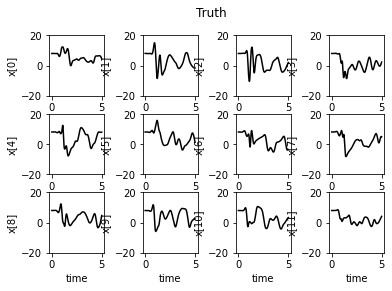

In [2]:
### 1.a The Nature Run
# Let us perform a 'free' run of the model, which we will consider the truth
# The initial conditions
model = 'L96'
x0 = None # let it spin from rest (x_n(t=0) = F, forall n )
tmax = 5
Nx = 12
t,xt = lorenz96(tmax,x0,Nx) # Nx>=12
plotL96(t,xt,Nx)

# imperfect initial guess for our DA experiments
forc = 8.0; aux1 = forc*np.ones(Nx); aux2 = range(Nx); 
x0guess = aux1 + ((-1)*np.ones(Nx))**aux2
del aux1, aux2

We now generate the observations by adding noise to selected variables at selected times. Every second variable is observed at every 10 time steps. The observations are shown with red dots.

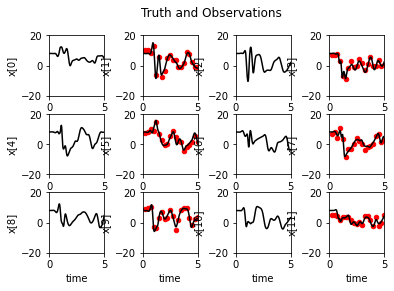

In [3]:
### 2. The observations
# Decide what variables to observe
obsgrid = '1010'
H, observed_vars = createH(obsgrid,model,Nx)
period_obs = 10
var_obs = 2
# Generating the observations
seed = 1
tobs,y,R = gen_obs(t,xt,period_obs,H,var_obs,seed)
plotL96obs(t,xt,Nx,tobs,y,observed_vars)

In the experiments, we will perform data assimilation using Stochastic Ensemble Kalman filter. We will show the analysis for each ensemble member and their mean.

# Activity 2. Localisation
Set the ensemble size M=10. The localisation parameter 'lam' limits the use of observations that are far away in space.  Run the experiments with lam=2 and lam = None, where None means that all the observations are used. How does the analysis change? What is the effect on the ensemble spread?

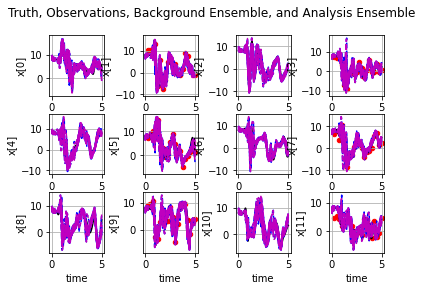

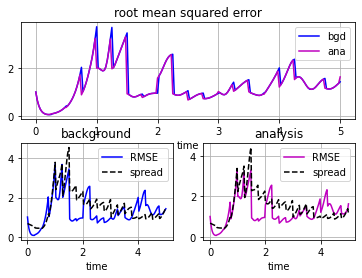

In [4]:
### 3. Data assimilation using KFa (SEnKF, LSEnKF and ETKF)
# No LETKF since R-localisation is extremely slow without parallel implementation    
rho = 0.1
M = 10
lam = 2
loctype = 'GC'
met = 'SEnKF' 
Xb,xb,Xa,xa,locmatrix = kfs_lor96(x0guess,t,tobs,y,H,R,rho,M,met,lam,loctype)
plotL96DA_kf(t,xt,tobs,y,Nx,observed_vars,Xb,xb,Xa,xa)

rmse_step=1
rmseb,spreadb = rmse_spread(xt,xb,Xb,rmse_step)
rmsea,spreada = rmse_spread(xt,xa,Xa,rmse_step)
plotRMSP(t,rmseb,rmsea,spreadb,spreada)

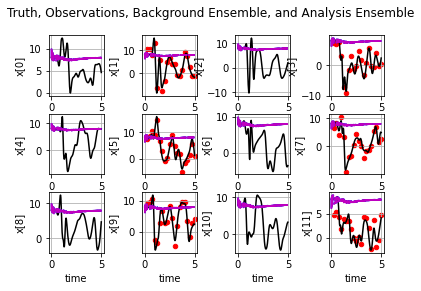

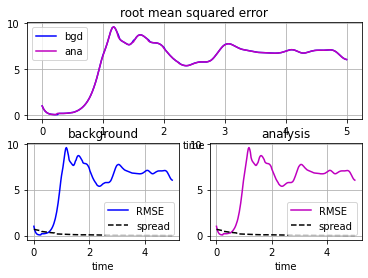

In [6]:
lam = None

Xb,xb,Xa,xa,locmatrix = kfs_lor96(x0guess,t,tobs,y,H,R,rho,M,met,lam,loctype)
plotL96DA_kf(t,xt,tobs,y,Nx,observed_vars,Xb,xb,Xa,xa)

rmse_step=1
rmseb,spreadb = rmse_spread(xt,xb,Xb,rmse_step)
rmsea,spreada = rmse_spread(xt,xa,Xa,rmse_step)
plotRMSP(t,rmseb,rmsea,spreadb,spreada)